In [2]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

## Load Audio File

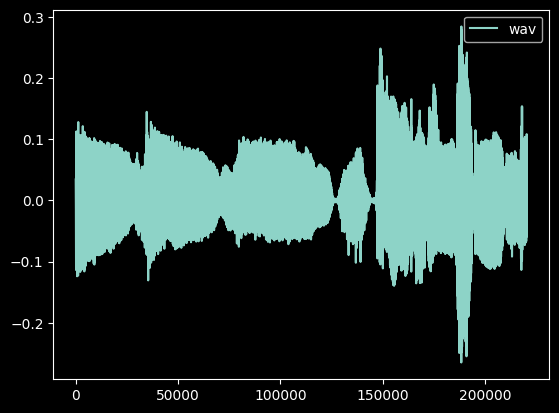

In [3]:
AUDIO_PATH = './test.wav'
wav, sr = sf.read(AUDIO_PATH)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.legend()

## Noise Shape Reverb

KeyboardInterrupt: 

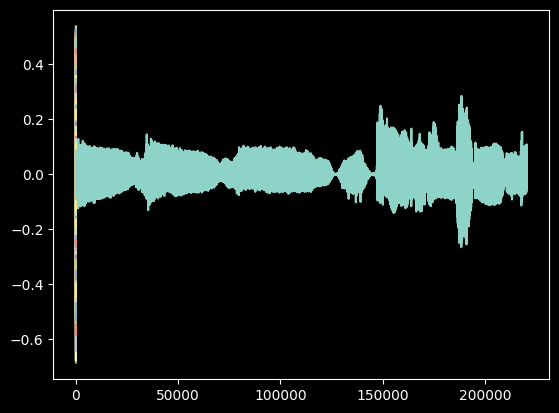

In [4]:
from diffFx_pytorch.processors.reverb import NoiseShapedReverb

DSP_PARAMS = {
    'band0_gain': 0.2,
    'band0_decay': 0.6,
    'band1_gain': 0.4,
    'band1_decay': 0.4,
    'band2_gain': 0.6,
    'band2_decay': 0.3,
    'band3_gain': 0.8,
    'band3_decay': 0.2,
    'band4_gain': 0.5,
    'band4_decay': 0.1,
    'band5_gain': 0.5,
    'band5_decay': 0.1,
    'band6_gain': 0.8,
    'band6_decay': 0.1,
    'band7_gain': 0.2,
    'band7_decay': 0.5,
    'band8_gain': 0.4,
    'band8_decay': 0.5,
    'band9_gain': 0.5,
    'band9_decay': 0.5,
    'band10_gain': 0.5,
    'band10_decay': 0.5,
    'band11_gain': 0.5,
    'band11_decay': 0.5,
    'mix': 0.5
}

Processor = NoiseShapedReverb(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
processed_wav = Processor(test_wav, None, DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=processed_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(processed_wav.squeeze().cpu().numpy(),      label='processed_wav')
plt.legend()
